In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# load cifar100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
# normalize the train and test
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
def evaluate_model(model, x_test, y_test):
  _,test_acc=model.evaluate(x_test, y_test)
  return test_acc

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(21, 21))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_history(history):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

In [ ]:
def print_metrics(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {acc}")
  pre_score=precision_score(y_test, y_pred, average='macro')
  print(f"Precision: {pre_score}")
  recall = recall_score(y_test, y_pred, average='macro')
  print(f"Recall: {recall}")

In [ ]:
cnn_model = Sequential([Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        MaxPooling2D((2,2)),
                        Conv2D(64,(3,3),activation='relu',padding='same'),
                        MaxPooling2D((2,2)),
                        Conv2D(128,(3,3),activation='relu',padding='same'),
                        MaxPooling2D((2,2)),
                        Conv2D(256,(3,3),activation='relu',padding='same'),
                        MaxPooling2D((2,2)),
                        Flatten(),
                        Dropout(0.4),
                        Dense(100,activation='softmax')])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
cnn_history = cnn_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.0902 - loss: 3.9548 - val_accuracy: 0.2334 - val_loss: 3.1757
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 122ms/step - accuracy: 0.2384 - loss: 3.1016 - val_accuracy: 0.3071 - val_loss: 2.7751
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 121ms/step - accuracy: 0.3140 - loss: 2.7188 - val_accuracy: 0.3578 - val_loss: 2.5232
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 120ms/step - accuracy: 0.3617 - loss: 2.4754 - val_accuracy: 0.3781 - val_loss: 2.4561
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 121ms/step - accuracy: 0.4054 - loss: 2.2706 - val_accuracy: 0.3829 - val_loss: 2.4210
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 122ms/step - accuracy: 0.4419 - loss: 2.1132 - val_accuracy: 0.4058 - val_loss: 2.3137
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 123ms/step - accuracy: 0.4615 - loss: 1.9976 - val_accuracy: 0.4176 - val_loss: 2.2619
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 121ms/step - ac

In [ ]:
evaluate_model(cnn_model, x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4263 - loss: 2.5119


0.42100000381469727

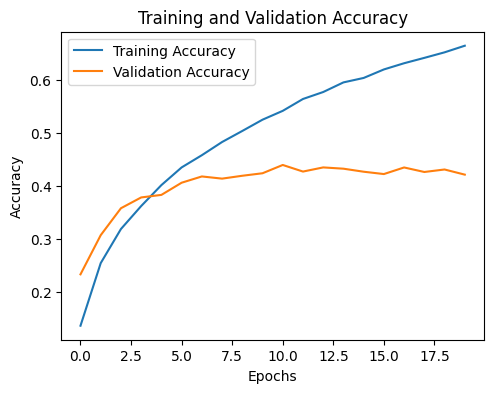

In [ ]:
plot_history(cnn_history)

In [ ]:
# get the confusion matrix
y_pred = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


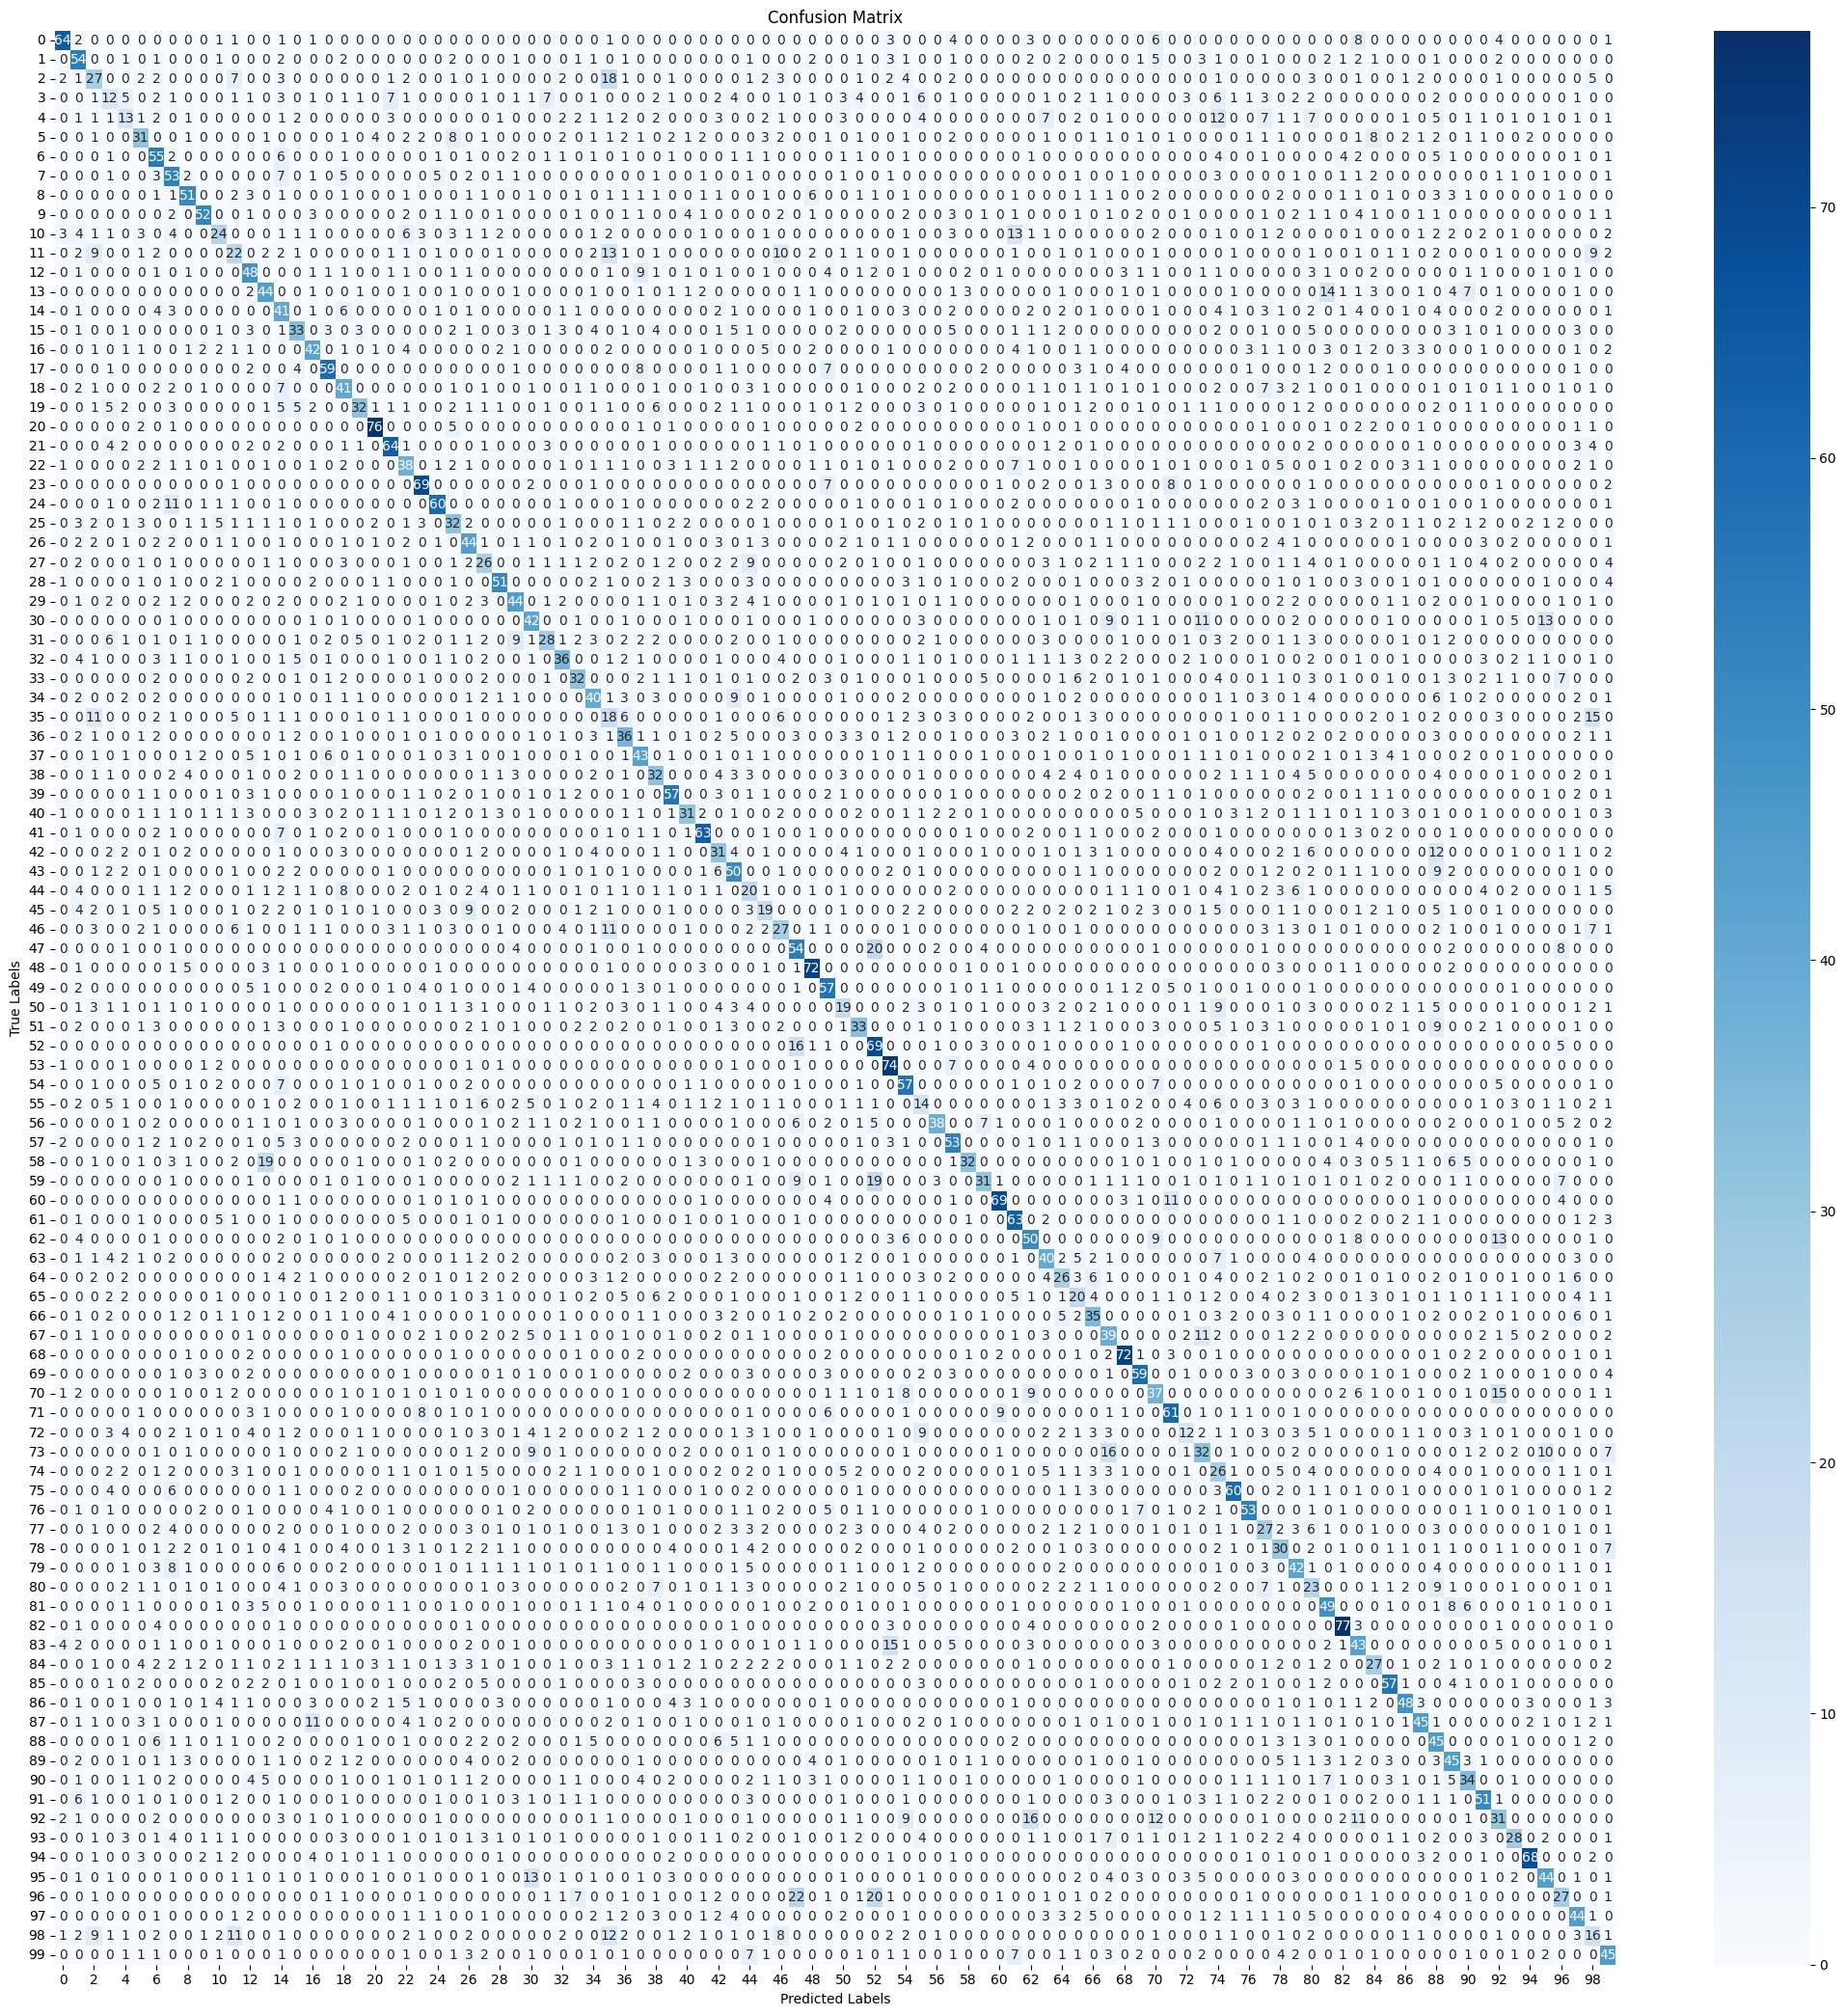

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.421


In [ ]:
pre_score=precision_score(y_test, y_pred, average='macro')
print(f"Precision: {pre_score}")

Precision: 0.43377198528930294


In [ ]:
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")

Recall: 0.42100000000000004


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# augment the dataset
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.3
)

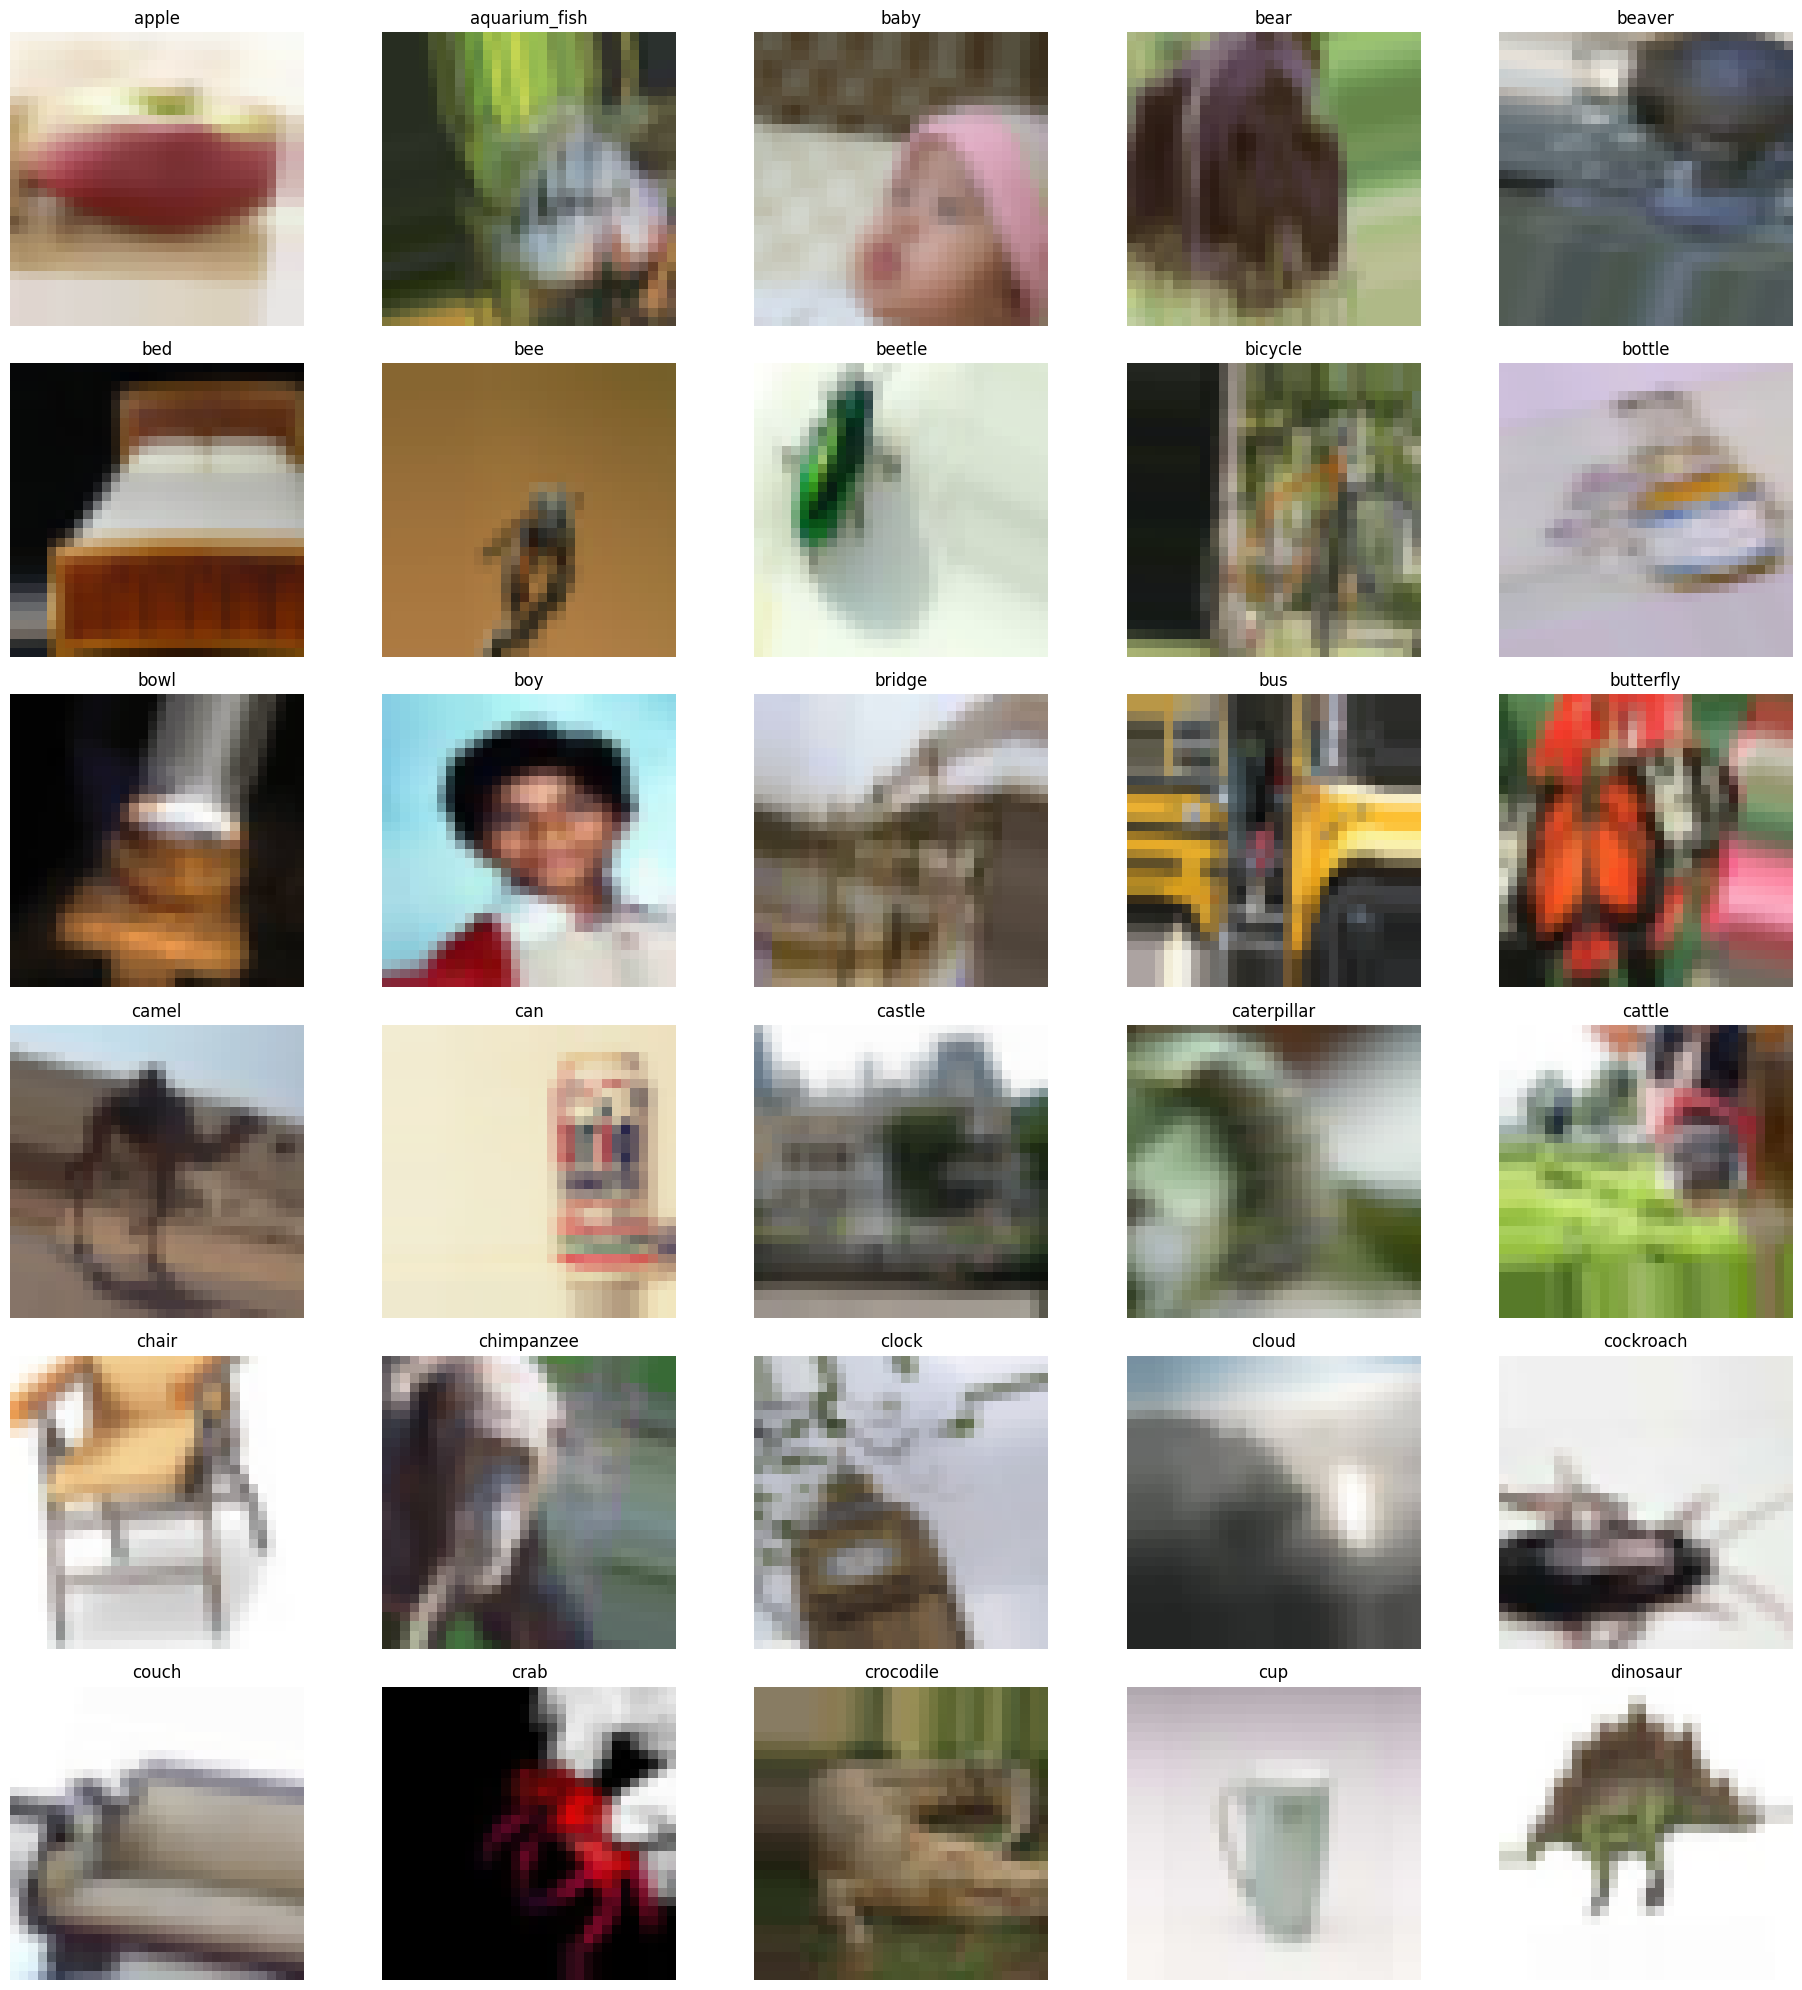

In [ ]:
# plot augmented images
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
unique_classes = np.unique(y_train)[:30]
class_indices = [np.where(y_train == class_id)[0][0] for class_id in unique_classes]

plt.figure(figsize=(20,20))

for i,classidx in enumerate(class_indices[:30]):
  image = x_train[classidx]
  image = image.reshape((1,)+image.shape)
  for batch in datagen.flow(image,batch_size=1):
    augmented_image =batch[0]
    augmented_image= np.clip(augmented_image*255,0,255).astype('uint8')
    break
  plt.subplot(6,5,i+1)
  plt.imshow(augmented_image)
  plt.title(class_names[unique_classes[i]])
  plt.axis('off')
  plt.tight_layout()
plt.show()


In [ ]:
tf.random.set_seed(42)

In [ ]:
datagen.fit(x_train)

In [ ]:
batch_size=32
augment_train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

In [ ]:
cnn_model_aug = Sequential([ Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        MaxPooling2D((2,2)),
                             Conv2D(64,(3,3),activation='relu',padding='same'),
                             MaxPooling2D((2,2)),
                             Conv2D(128,(3,3),activation='relu',padding='same'),
                             MaxPooling2D((2,2)),
                             Conv2D(128,(3,3),activation='relu',padding='same'),
                             MaxPooling2D((2,2)),
                             Conv2D(256,(3,3),activation='relu',padding='same'),
                             MaxPooling2D((2,2)),
                             Flatten(),
                             Dropout(0.2),
                             Dense(100,activation='softmax')])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model_aug.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
aug_history=cnn_model_aug.fit(augment_train_generator, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 143ms/step - accuracy: 0.0335 - loss: 4.3496 - val_accuracy: 0.1252 - val_loss: 3.7103
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 222s 142ms/step - accuracy: 0.1205 - loss: 3.7117 - val_accuracy: 0.1936 - val_loss: 3.3118
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 219s 140ms/step - accuracy: 0.1687 - loss: 3.4317 - val_accuracy: 0.2150 - val_loss: 3.1865
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 220s 140ms/step - accuracy: 0.2010 - loss: 3.2431 - val_accuracy: 0.2526 - val_loss: 3.0128
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 140ms/step - accuracy: 0.2294 - loss: 3.1190 - val_accuracy: 0.2861 - val_loss: 2.8472
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 140ms/step - accuracy: 0.2489 - loss: 3.0088 - val_accuracy: 0.2899 - val_loss: 2.8200
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 141ms/step - accuracy: 0.2602 - loss: 2.9517 - val_accuracy: 0.3093 - val_loss: 2.7433
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 142ms/step - accuracy: 0.2

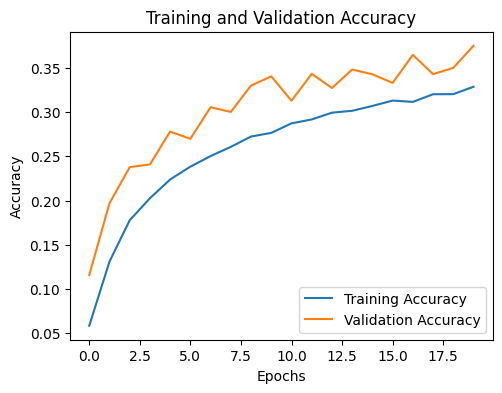

In [ ]:
plot_history(aug_history)

In [ ]:
y_pred_aug = cnn_model_aug.predict(x_test)
y_pred_aug = np.argmax(y_pred_aug, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


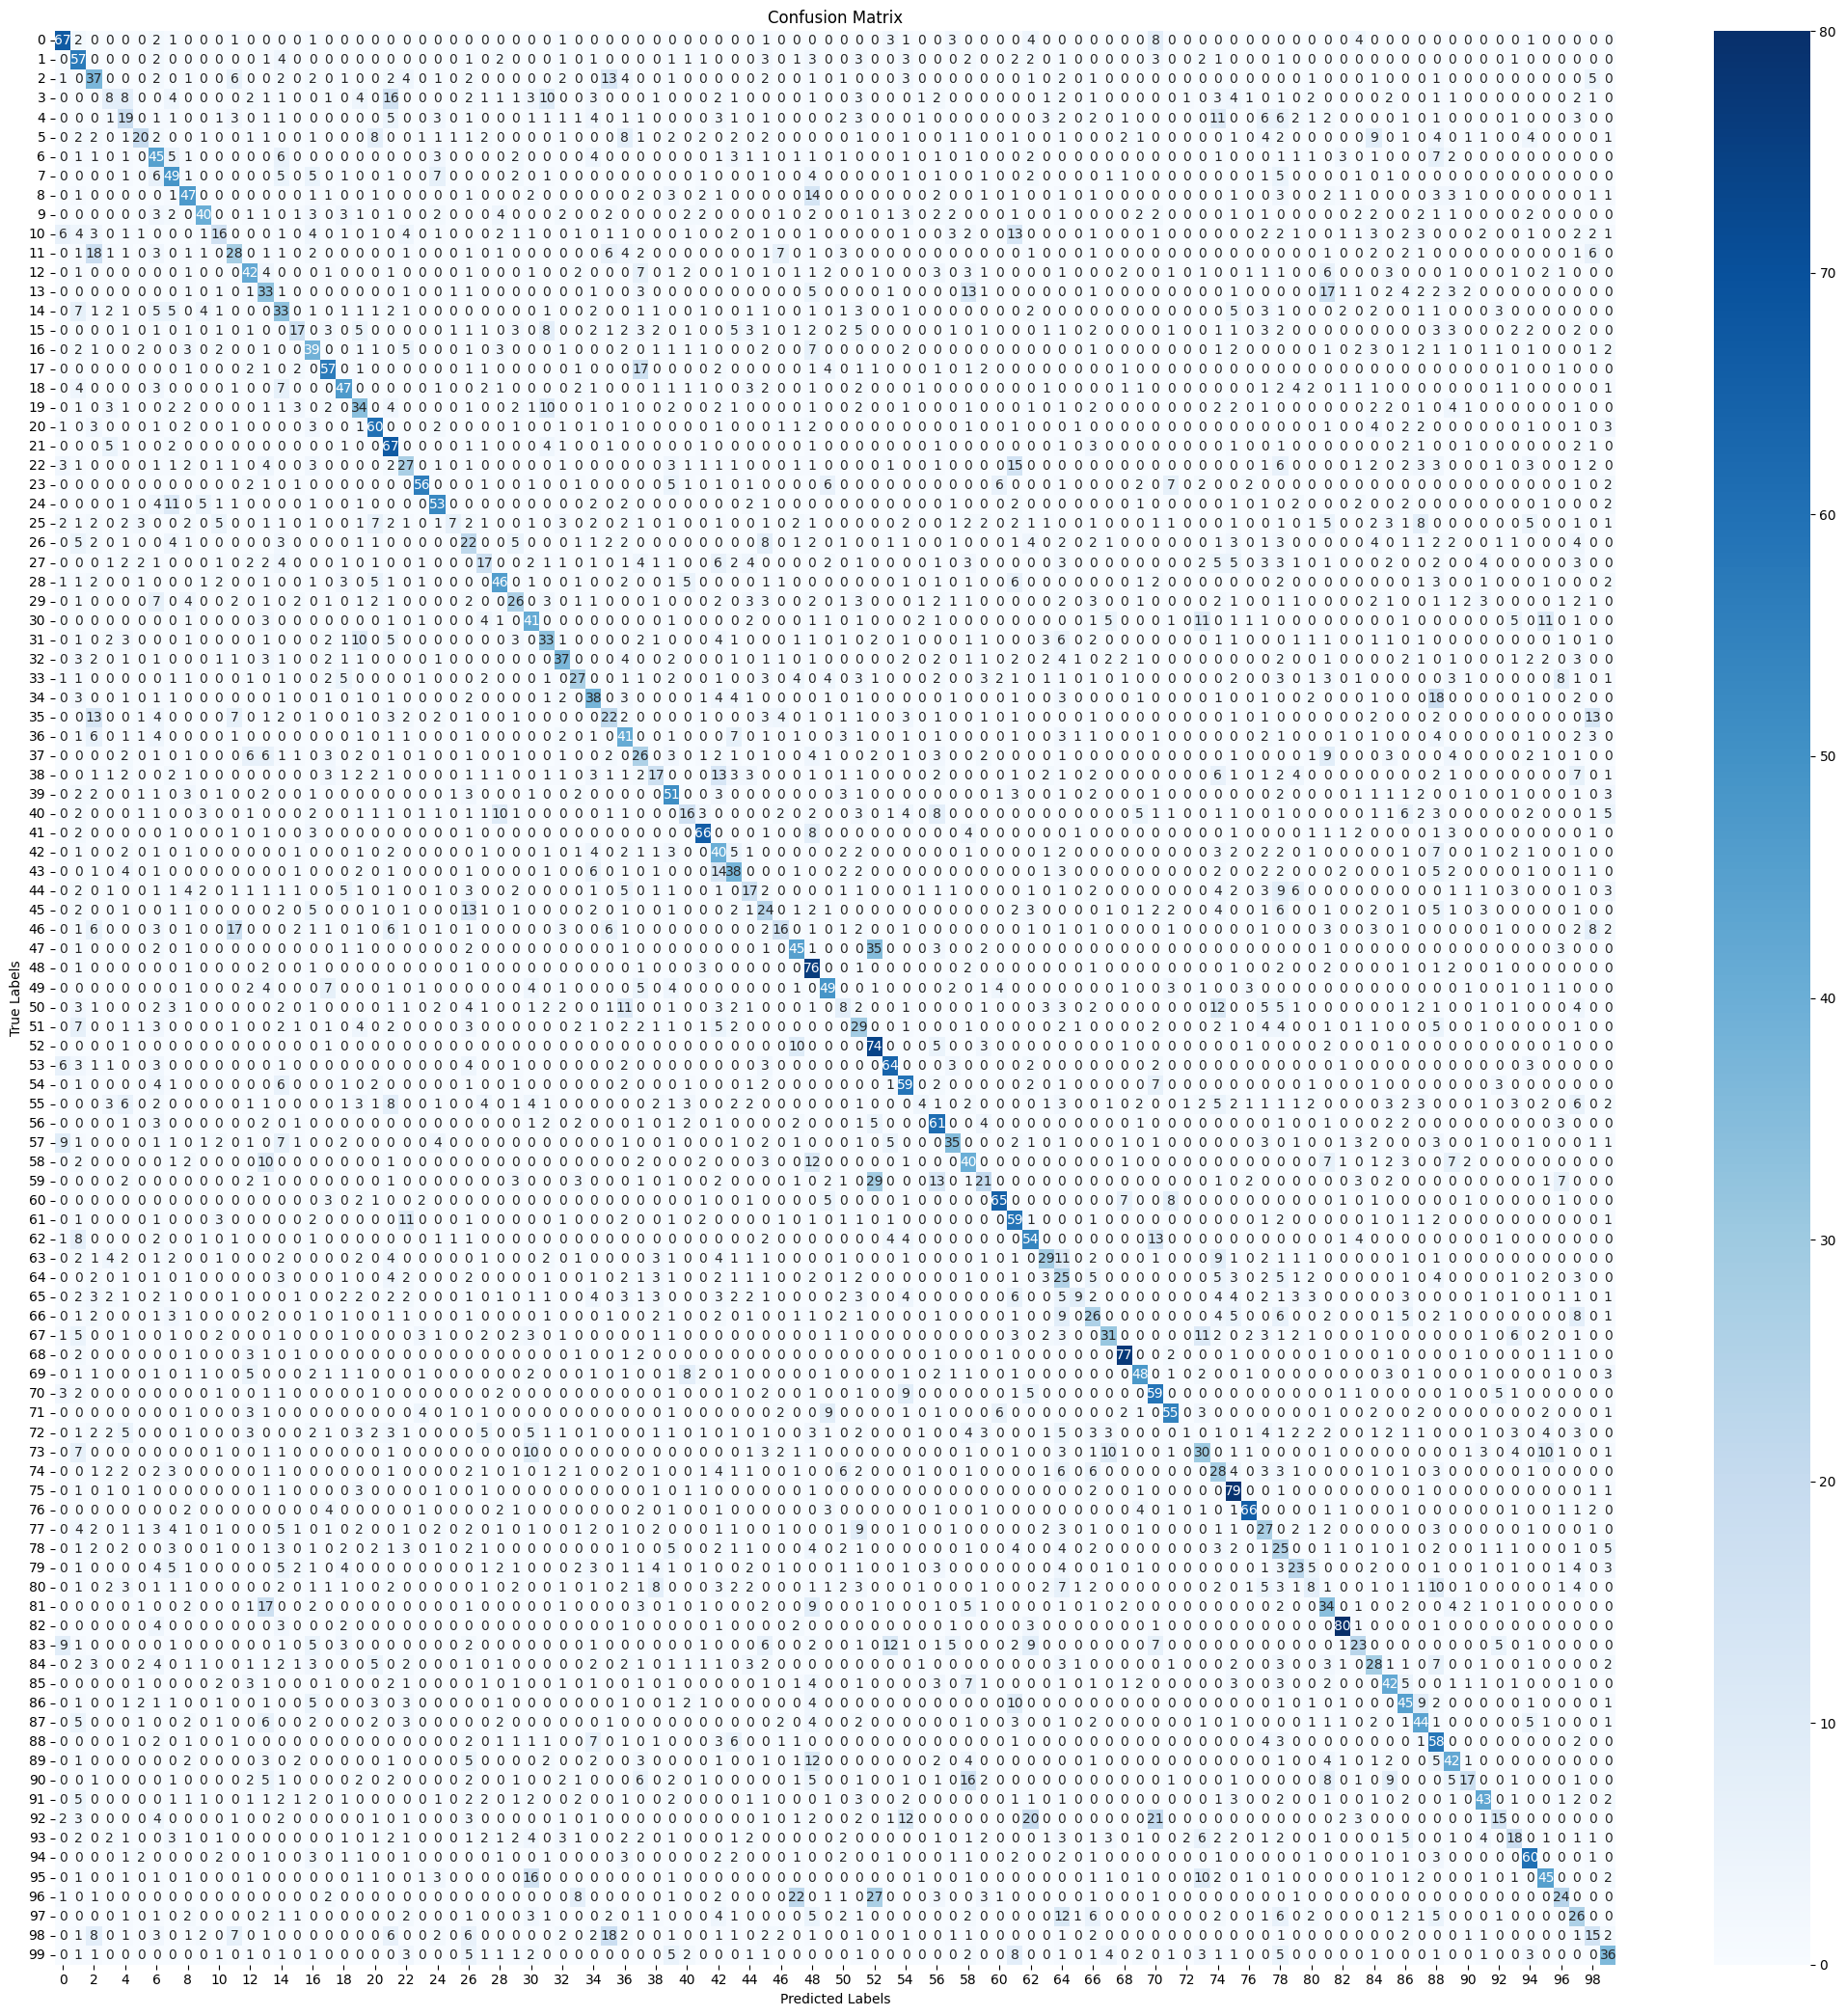

In [ ]:
plot_confusion_matrix(y_test, y_pred_aug)

In [ ]:
print_metrics(y_test, y_pred_aug)

Accuracy: 0.375
Precision: 0.3839634056417164
Recall: 0.375


In [ ]:
cnn_model_aug.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,685,102 (6.43 MB)

 Trainable params: 561,700 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,123,402 (4.29 MB)

In [ ]:
cnn_model_aug.predict(test_image)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[3.42050713e-04, 1.69979176e-03, 7.66040757e-03, ...,
        4.24179016e-03, 2.85737799e-03, 2.90046184e-04],
       [1.69301684e-10, 1.47487140e-06, 1.30058098e-07, ...,
        3.09035508e-03, 2.10550823e-07, 1.84584292e-06],
       [4.82529908e-01, 1.31542583e-05, 2.93667591e-03, ...,
        3.85465921e-12, 3.32266936e-05, 1.08078675e-05],
       ...,
       [1.76970661e-05, 4.16375005e-05, 1.28467369e-03, ...,
        2.18773610e-03, 2.93330057e-03, 4.87598263e-05],
       [5.08120411e-06, 1.30469061e-03, 1.15451962e-03, ...,
        3.48429941e-03, 1.90341118e-04, 1.50402775e-02],
       [1.12417683e-06, 2.54100910e-03, 1.06258696e-07, ...,
        8.78189780e-07, 5.77257561e-06, 3.83457430e-02]], dtype=float32)

# Grad-Cam

In [ ]:
output = [layer.output for layer in cnn_model_aug.layers[1:10]]
new_model = tf.keras.models.Model([cnn_model_aug.inputs], output)
layers = []

for layer in new_model.layers:
  layers.append(layer.name)
print(layers)

NameError: name 'cnn_model_aug' is not defined

In [ ]:
# grad-Cam function for cifar100
def generate_gradcam(model,img, classidx, layername):
  output = [layer.output for layer in model.layers[1:10]]
  _ = model(np.array([img]))

  grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layername).output, model.output])
  _ = grad_model(np.array([img]))
  with tf.GradientTape() as tape:
    feature_maps, predictions = grad_model(np.array([img]))
    loss = predictions[:, classidx]
    # calculate the gradient of the class score with respect to the feature map
  grads = tape.gradient(loss, feature_maps)
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # multiply feature map by their important weights
  feature_maps = feature_maps[0]
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads,feature_maps),axis=-1)
  heatmap = tf.maximum(heatmap, 0)
    # heatmap /= np.max(heatmap)
    # heatmap = np.uint8(255 * heatmap)
  return heatmap.numpy()

In [ ]:
import cv2
def overlay_heatmap(heatmap, img,alpha=0.5,cmap='viridis'):
  # resize heatmap to match image
  heatmap_resize = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # apply colormap to heatmap

  heatmap_color = plt.get_cmap(cmap)(heatmap_resize)
  heatmap_color = (heatmap_color[:,:,:3]*255).astype('uint8')
  # converting input image to  8-bit

  img = (img*255).astype('uint8')
  # overlay heatmap on the image
  overlay = cv2.addWeighted(img, alpha, heatmap_color, 1-alpha, 0)
  return overlay


In [ ]:
layer_name = 'conv2d_9'
test_image = x_test[0:1]

_ = cnn_model_aug.predict(np.array([test_image[0]]))
class_idx = np.argmax(cnn_model_aug.predict(np.array([test_image[0]])))

# Generate Grad-Cam
heatmap = generate_gradcam(cnn_model_aug, test_image[0], class_idx, layer_name)

# overlay heatmap on original image

overlayed_image = overlay_heatmap(test_image[0], heatmap)

# Display the original image and the superimposed image

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(overlayed_image)
plt.title('Superimposed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


ValueError: The layer sequential_1 has never been called and thus has no defined output.

In [ ]:
print(cnn_model_aug.inputs)
print(cnn_model_aug.outputs)

[<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, name=keras_tensor_13>]
[<KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_25>]


In [ ]:
for layer in cnn_model_aug.layers:
    print(layer.name)

conv2d_5
max_pooling2d_4
conv2d_6
max_pooling2d_5
conv2d_7
max_pooling2d_6
conv2d_8
conv2d_9
max_pooling2d_7
flatten_1
dropout_1
dense_1


In [ ]:
layer = cnn_model_aug.get_layer('conv2d_5')
print(layer.output)

<KerasTensor shape=(None, 32, 32, 32), dtype=float32, sparse=False, name=keras_tensor_14>


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# reshape and normalize images

x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1)/255.0

# # flatten images
# x_train=x_train.flatten()
# x_test=x_test.flatten()





In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=min(x_train.shape[0],x_train.shape[1]))
x_train=pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# train a logisticregression for the task

lr_model = LogisticRegression(max_iter=1000,multi_class='multinomial')
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred_lgr = lr_model.predict(x_test)

In [ ]:
print_metrics(y_test, y_pred_lgr)

Accuracy: 0.0774
Precision: 0.07716834141831903
Recall: 0.0774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hypothesis

In [ ]:
H0 = 'deep learning model does not out perform Logistic regression classification'
H1 = 'Deep Learning models out perform Logistic regression in image classification'

In [ ]:
import scipy.stats as stats

In [ ]:
logitic_metrics=[0.0774,0.077168,0.0774]
cnn_aug_metrics=[0.375,0.38396,0.375]


In [ ]:
t_stat, p_value = stats.ttest_ind(logitic_metrics, cnn_aug_metrics,equal_var=False)

In [ ]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -100.6350
P-value: 0.0001


In [ ]:
if p_value<0.05:
    print("Reject the null hypothesis",H1)
else:
    print("Fail to reject the null hypothesis",H0)

Reject the null hypothesis Deep Learning models out perform Logisyic regression in image classification


In [ ]:
H0='Image Augmentation does not improve the model performance'
H1='Image Augmentation improves the model performance'

In [ ]:
cnn_metrics = [0.421,0.43377,0.4210]
t_stat, p_value = stats.ttest_ind(cnn_metrics, cnn_aug_metrics,equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 9.0905
P-value: 0.0013


In [ ]:
if p_value<0.05:
    print("Reject the null hypothesis",H1)
else:
    print("Fail to reject the null hypothesis",H0)

Reject the null hypothesis Image Augmentation improves the model performance


In [ ]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [ ]:
# identify classes with high misclassification rate
cm = confusion_matrix(y_test, y_pred_aug)

# calculate the misclassification rate for each class
misclassification_rates = []
for i in range(len(cm)):
  total_samples = np.sum(cm[i, :])
  correct_predictions = cm[i, i]
  incorrect_predictions = total_samples - correct_predictions
  misclassification_rate = incorrect_predictions / total_samples
  misclassification_rates.append(misclassification_rate)

# find the classes with the highest misclassification rate

print(misclassification_rates)

[0.33, 0.43, 0.63, 0.92, 0.81, 0.8, 0.55, 0.51, 0.53, 0.6, 0.84, 0.72, 0.58, 0.67, 0.67, 0.83, 0.61, 0.43, 0.53, 0.66, 0.4, 0.33, 0.73, 0.44, 0.47, 0.93, 0.78, 0.83, 0.54, 0.74, 0.59, 0.67, 0.63, 0.73, 0.62, 0.78, 0.59, 0.74, 0.83, 0.49, 0.84, 0.34, 0.6, 0.62, 0.83, 0.76, 0.84, 0.55, 0.24, 0.51, 0.92, 0.71, 0.26, 0.36, 0.41, 0.96, 0.39, 0.65, 0.6, 0.79, 0.35, 0.41, 0.46, 0.71, 0.75, 0.91, 0.74, 0.69, 0.23, 0.52, 0.41, 0.45, 0.99, 0.7, 0.72, 0.21, 0.34, 0.73, 0.75, 0.77, 0.92, 0.66, 0.2, 0.77, 0.72, 0.58, 0.55, 0.56, 0.42, 0.58, 0.83, 0.57, 0.85, 0.82, 0.4, 0.55, 0.76, 0.74, 0.85, 0.64]


In [ ]:
# sort class names with the highest misclassification rate
misclassified_classes = sorted(zip(misclassification_rates, class_names),key = lambda x: x[0], reverse=True)


In [ ]:
print(misclassified_classes)

[(0.99, 'seal'), (0.96, 'otter'), (0.93, 'couch'), (0.92, 'bear'), (0.92, 'mouse'), (0.92, 'squirrel'), (0.91, 'rabbit'), (0.85, 'tulip'), (0.85, 'woman'), (0.84, 'bowl'), (0.84, 'lamp'), (0.84, 'man'), (0.83, 'camel'), (0.83, 'crocodile'), (0.83, 'kangaroo'), (0.83, 'lizard'), (0.83, 'train'), (0.82, 'turtle'), (0.81, 'beaver'), (0.8, 'bed'), (0.79, 'pine_tree'), (0.78, 'crab'), (0.78, 'girl'), (0.77, 'spider'), (0.77, 'sweet_pepper'), (0.76, 'lobster'), (0.76, 'willow_tree'), (0.75, 'possum'), (0.75, 'snake'), (0.74, 'dinosaur'), (0.74, 'house'), (0.74, 'raccoon'), (0.74, 'wolf'), (0.73, 'clock'), (0.73, 'forest'), (0.73, 'snail'), (0.72, 'boy'), (0.72, 'shrew'), (0.72, 'table'), (0.71, 'mushroom'), (0.71, 'porcupine'), (0.7, 'shark'), (0.69, 'ray'), (0.67, 'bus'), (0.67, 'butterfly'), (0.67, 'elephant'), (0.66, 'cattle'), (0.66, 'streetcar'), (0.65, 'pear'), (0.64, 'worm'), (0.63, 'baby'), (0.63, 'flatfish'), (0.62, 'fox'), (0.62, 'lion'), (0.61, 'can'), (0.6, 'bottle'), (0.6, 'leop

In [ ]:
for i, (class_name,rate) in enumerate(misclassified_classes[:10]):
  print(f"{i+1}. {class_name}: {rate}")

1. 0.99: seal
2. 0.96: otter
3. 0.93: couch
4. 0.92: bear
5. 0.92: mouse
6. 0.92: squirrel
7. 0.91: rabbit
8. 0.85: tulip
9. 0.85: woman
10. 0.84: bowl


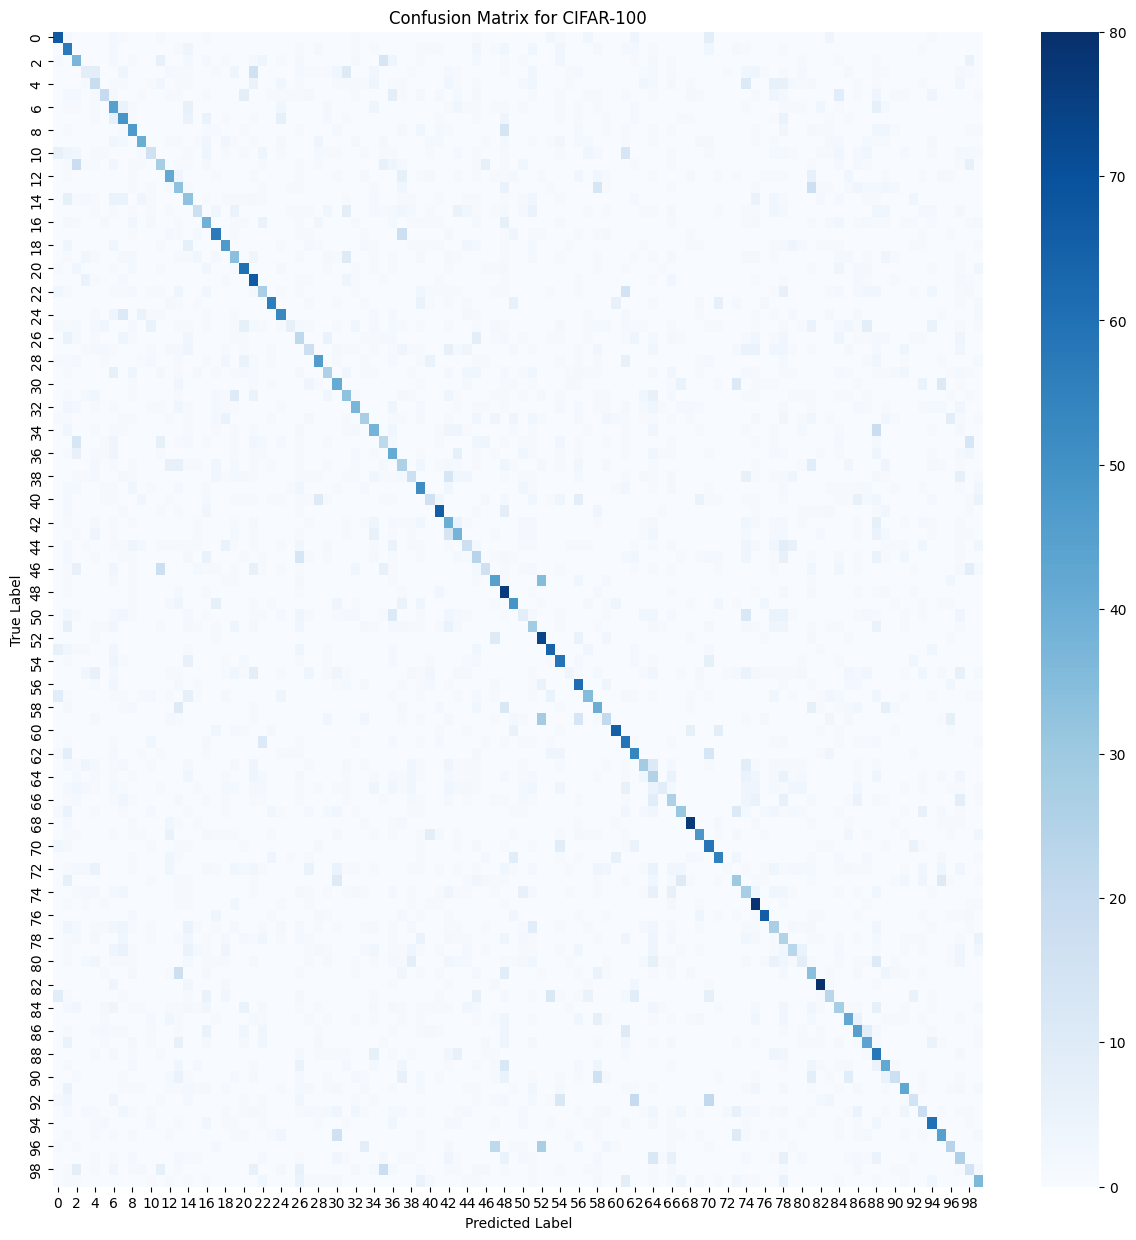

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CIFAR-100')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()